## Empresa de E-Commerce

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np

In [3]:
# Carregar o dataset
df = pd.read_csv("vendas.csv")

In [4]:
# Imprimir
df.head()

,ID_Venda,Data_Venda,Cliente,Produto,Categoria,Regiao,Valor_Venda,Quantidade,Total
0,V0001,2023-12-25 00:44:51,Cliente_128,Produto_C,Alimentos,Oeste,294.60,2,589.20
1,V0002,2024-08-16 05:57:44,Cliente_177,Produto_E,Móveis,Sul,169.74,3,509.22
2,V0003,2023-01-01 16:51:03,Cliente_84,Produto_B,Roupas,Sul,130.78,3,392.34
3,V0004,2024-11-07 23:37:58,Cliente_78,Produto_A,Eletrônicos,Sul,510.95,2,1021.90
4,V0005,2023-03-25 07:51:39,Cliente_138,Produto_D,Eletrônicos,Norte,228.76,3,686.28


## 1. Análise Descritiva:

In [5]:
# Estatísticas descritivas para o dataset
df.describe()

,Valor_Venda,Quantidade,Total
count,1000.000000,1000.000000,1000.000000
mean,498.711620,2.956000,1482.084630
std,287.041439,1.412111,1194.887462
min,10.030000,1.000000,16.310000
25%,245.622500,2.000000,508.280000
50%,513.240000,3.000000,1165.260000
75%,735.515000,4.000000,2167.155000
max,999.970000,5.000000,4986.900000


**Análise da coluna 'Valor_Venda'**

#### A distribuição do Valor_Venda parece razoável. A média de 498,71 é razoável considerando que o mínimo é 10,03 e o máximo é 999,97. O desvio padrão relativamente alto (287,04) indica que os valores dos produtos vendidos variam bastante, o que é comum quando há diferentes tipos de produtos.

**Análise da coluna 'Quantidade'**

#### A média de 2,96 e o desvio padrão de 1,41 indicam que a maioria das vendas envolvem de 1 a 5 unidades de um produto. Esse é um valor razoável e sugere que não há grandes variações nas quantidades vendidas. Nenhuma anomalia é evidente aqui, já que o máximo (5) e o mínimo (1) estão dentro de um intervalo esperado.
#### 2,96−1,41=1,55 unidades (aproximadamente) 
#### 2,96+1,41=4,372,96+1,41=4,37 unidades (aproximadamente).

## 2. Testes de Hipóteses:

In [6]:
from scipy import stats

# Separar as vendas das categorias
vendas_eletronicos = df[df['Categoria'] == 'Eletrônicos']['Total']
vendas_beleza = df[df['Categoria'] == 'Beleza']['Total']

# Teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(vendas_eletronicos, vendas_beleza)

print(f'Testatística t: {t_stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Há uma diferença significativa nas vendas entre as categorias.")
else:
    print("Não há uma diferença significativa nas vendas entre as categorias.")

Testatística t: -1.9993139649073237
Valor p: 0.046195947851682934
Há uma diferença significativa nas vendas entre as categorias.


#### A estatística t representa a diferença entre as médias das duas amostras (vendas de "Eletrônicos" e "Beleza") em termos do erro padrão. O valor de -1.9993 indica que a diferença entre as médias das duas categorias não é muito grande em termos relativos, e o sinal negativo significa que a média das vendas de "Eletrônicos" é menor que a de "Beleza" (em comparação com o erro padrão).

#### O valor p é a probabilidade de observar uma diferença tão grande ou maior entre as amostras, assumindo que a hipótese nula seja verdadeira (ou seja, que não há diferença real entre as duas categorias). O valor p é comparado com um nível de significância (α) para decidir se rejeitamos ou não a hipótese nula.

#### Como o valor p é menor que 0,05, podemos rejeitar a hipótese nula (que afirma que não há diferença nas vendas entre as categorias). Isso significa que há evidências suficientes para concluir que existe uma diferença significativa nas vendas entre os produtos das categorias "Eletrônicos" e "Beleza".

## 3. Correlação entre Variáveis:

In [11]:
# Calcular a correlação entre Quantidade e Total
cor = df[['Quantidade', 'Total']].corr()
print(cor)

            Quantidade     Total
Quantidade    1.000000  0.607141
Total         0.607141  1.000000


#### O valor 0,607141 indica uma correlação positiva moderada entre as variáveis Quantidade e Total. Então, quando a quantidade de itens vendidos aumenta, o valor total da venda também tende a aumentar. A relação não é perfeita (o valor seria 1 para uma correlação perfeita), mas ainda é considerável.

## 4. Regressão Linear:

In [8]:
from sklearn.linear_model import LinearRegression

# Variáveis independentes (Preço e Quantidade)
X = df[['Valor_Venda', 'Quantidade']]
y = df['Total']

# Criar o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Coeficientes
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

Coeficientes: [  3.00346974 501.84493718]
Intercepto: -1499.234263639397


## 5. Análise de Sazonalidade e Tendência:

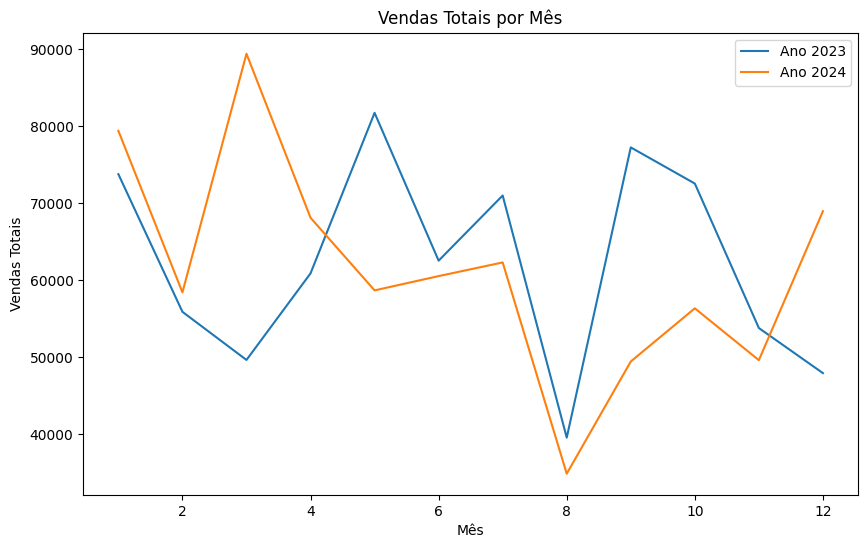

In [9]:
# Converter a coluna 'Data_Venda' para datetime
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Extrair o mês e ano
df['Ano'] = df['Data_Venda'].dt.year
df['Mes'] = df['Data_Venda'].dt.month

# Agrupar por mês e calcular as vendas totais
vendas_mensais = df.groupby(['Ano', 'Mes'])['Total'].sum().reset_index()

# Plotar a série temporal
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for ano in vendas_mensais['Ano'].unique():
    plt.plot(vendas_mensais[vendas_mensais['Ano'] == ano]['Mes'], 
             vendas_mensais[vendas_mensais['Ano'] == ano]['Total'], label=f'Ano {ano}')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Mês')
plt.legend()
plt.show()